<a href="https://colab.research.google.com/github/Clinton1029/Data_analysis/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) DataAcquisition Using the Iris Dataset

In [14]:
import os          # For interacting with the operating system
import pandas as pd  # For data analysis and CSV handling
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



In [8]:
#loading the dataset
file_path = "/content/IRIS1.csv"
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("CSV file loaded successfully")
else:
    print("Cannot load CSV — file not found")


CSV file loaded successfully


In [6]:
# Display first 5 rows
data.head()




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Display first 5 rows
data.tail()


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# Number of observations (rows) and features (columns)
num_observations, num_features = data.shape

print("Number of observations (rows):", num_observations)
print("Number of features (columns):", num_features)


Number of observations (rows): 150
Number of features (columns): 5


## 2) DataStructure Inspection


In [9]:
# Display data types of each column
data.dtypes


,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


### 2b) Numerical (Continuous):
Variables measured on a continuous scale and usually stored as float

### Numerical (Discrete):
Countable variables stored as integers (int)

### Categorical:
Variables representing labels or groups, stored as object or category

### 3) Target Variable


#### a) Target (Dependent) Variable

The target (dependent) variable in the Iris dataset is:

species

#### b) Role of the Target Variable in the Analysis

The target variable species represents the class or outcome that the analysis aims to predict.
It indicates the type of iris flower (Setosa, Versicolor, or Virginica) based on the measured features of the flower.

#### c) Justification for Choosing species as the Target Variable

The choice of species as the target variable is justified because:

The primary objective of the Iris dataset is classification of iris flowers

The remaining variables (sepal length, sepal width, petal length, petal width) are predictor features

Flower species naturally depends on physical measurements

#### d) Nature of the Target Variable and Implications for Model Selection

Type of Target Variable:
Categorical

Implications for Model Selection:

The problem is a classification task, not regression

Suitable models include:

Logistic Regression (multiclass)

Decision Trees

Random Forest

Support Vector Machines (SVM)

k-Nearest Neighbors (kNN)
Regression models are not appropriate, since the target does not represent numerical values

#### e) Use of the Target Variable in Machine Learning / Statistical Modeling

In a modeling task, the target variable will be:

Separated from the feature set:

Features (X): Sepal length, sepal width, petal length, petal width

Target (y): Species

Used to:

Train the model by learning relationships between features and species

Evaluate model performance using metrics such as:

Accuracy

Precision

Recall

Confusion matrix

Encoded numerically (e.g., label encoding) to make it usable by machine learning algorithms

### 4) BasicDataFrame Operations and Descriptive Exploration


In [9]:
def summary_statistics(df):
    numerical_df = df.select_dtypes(include=[ 'float64'])

    summary = pd.DataFrame({
        "Mean": np.mean(numerical_df, axis=0),
        "Median": np.median(numerical_df, axis=0),
        "Standard Deviation": np.std(numerical_df, axis=0, ddof=1),
        "Minimum": np.min(numerical_df, axis=0),
        "Maximum": np.max(numerical_df, axis=0),
        "Mode": stats.mode(numerical_df, axis=0, keepdims=False).mode
    })

    return summary

summary_stats = summary_statistics(data)
summary_stats


,Mean,Median,Standard Deviation,Minimum,Maximum,Mode
sepal_length,5.843333,5.80,0.828066,4.3,7.9,5.0
sepal_width,3.054000,3.00,0.433594,2.0,4.4,3.0
petal_length,3.758667,4.35,1.764420,1.0,6.9,1.5
petal_width,1.198667,1.30,0.763161,0.1,2.5,0.2


#### b) Interpretation of the Computed Statistics (Iris Dataset)

#### 1. Central Tendency of the Data

The mean and median values for all four numerical features are very close.

This indicates that the measurements are centered around typical flower sizes.

Interpretation:

Sepal measurements represent moderate variability across all iris species.

Petal measurements have higher central values, especially petal length, reflecting clear differences among species.

The mode represents the most commonly occurring measurements, which are influenced by the dominant species patterns in the dataset.

#### 2. Variability or Dispersion of the Data

Standard deviation is higher for petal length and petal width compared to sepal measurements.

Sepal width shows relatively lower variability.

Interpretation:

Higher dispersion in petal features indicates greater differences between species.

Lower dispersion in sepal width suggests that sepal width values are more tightly clustered.

#### 3. Overall Spread and Range of the Data

The minimum and maximum values show that:

Petal length and petal width have a wide range.

Sepal features have a narrower range.

Interpretation:

A wider range in petal features reflects significant biological differences among the three iris species.

The overall spread confirms that the dataset captures diverse observations.

#### c) Comparison of Mean and Median (Symmetry & Skewness)

For sepal length, sepal width, petal length, and petal width, the mean is approximately equal to the median.

What this indicates:

The distributions of these numerical features are approximately symmetric.

There is little to no skewness in the data.

Extreme values or outliers do not strongly affect the datase

### 5) Indexing and Filtering


#### a) Extract all observations belonging to a single Iris species

In [10]:
setosa_data = data.loc[data["species"] == "Iris-setosa"]
setosa_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### b) Select only petal-related features

In [11]:
petal_features = data.loc[:, ["petal_length", "petal_width"]]
petal_features.head()


,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


#### c) Why column subsetting is necessary in data analysis

Column subsetting is necessary because:

It allows analysts to focus on relevant features

Reduces dimensionality of the dataset

Improves model performance and efficiency

Simplifies visualization and interpretation

Removes irrelevant or redundant variables

### 6 ) Missing Values and Duplicates


#### a) Check for missing values in the dataset

In [12]:
data.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


#### b) Verify whether duplicate records exist in the dataset

In [13]:
data.duplicated().sum()


np.int64(3)

#### c) Should duplicates be removed? (Justification)

In the context of the Iris dataset:

Duplicate records should be removed if they represent repeated measurements of the same observation

Keeping duplicates can:

Bias statistical summaries

Affect model training by over-representing certain observations

If duplicates are intentional (e.g., repeated experiments), they may be retained

### 7) Data Visualization
#### 7.1 Univariate Analysis: Histograms for numerical features


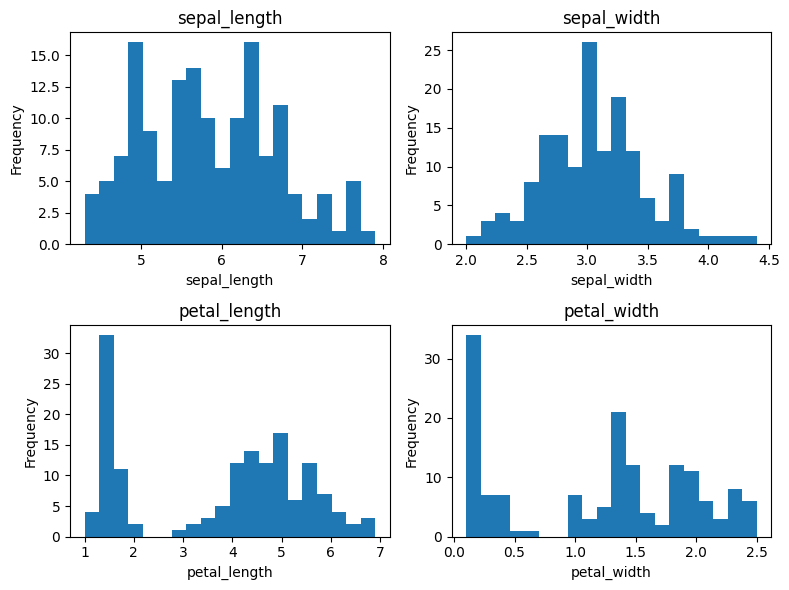

In [25]:

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].hist(data[feature], bins=20)
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()